<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
               Age  Annual Income (k$)  Spending Sc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


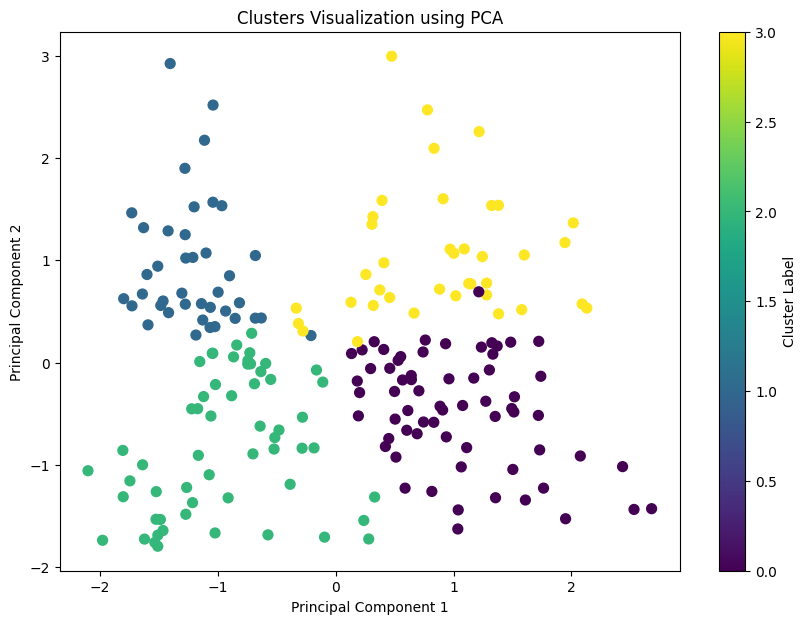

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load the dataset
url = '/content/Mall_Customers.csv'
df = pd.read_csv(url)

# Display basic info about the dataset
print(df.info())
print(df.head())

# Identify categorical columns (assuming 'Gender' as an example, update based on your dataset)
categorical_features = ['Gender']  # Replace with actual categorical columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features = [col for col in numeric_features if col not in ['CustomerID']]

# Preprocess the data
df = df.drop(['CustomerID'], axis=1, errors='ignore')  # Drop 'CustomerID' if present

# Create preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply preprocessing and fit K-means
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('cluster', KMeans(n_clusters=4, random_state=42))])

# Fit the pipeline to the data
df_transformed = preprocessor.fit_transform(df) # Transform the data using the preprocessor
cluster_labels = pipeline.named_steps['cluster'].fit_predict(df_transformed) # Fit KMeans on the transformed data

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Analyze the clusters (Calculate the mean for numerical columns only)
print(df.groupby('Cluster')[numeric_features].mean())

# Optional: Calculate the silhouette score
silhouette_avg = silhouette_score(df_transformed, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

# Reduce dimensionality using PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_transformed)

# Plot clusters
plt.figure(figsize=(10, 7))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster Label')
plt.title('Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
